# Let's take on this challenge of new beinnings!

## Importing the Libraries

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans
from sklearn import metrics

## Now we add the dataset

In [40]:
path = "DataKMean.csv"

In [27]:
dataset = pd.read_csv(path)
dataset.head()

,Test_age_T1,Body_height_cm_T1,Sitting_height_cm_T1,Arm_span_cm_T1,Arm_length_cm_T1,Leg_length_cm_T1,Chest_girth_cm_T1,Shoulder_width_cm_T1,Crista_width_cm_T1,Calf_girth_cm_T1,Thigh_circumference_cm_T1,Waist_girth_cm_T1,LowerLeg_length_cm_T1,Ankle_circumference_cm_T1,Subscapular_angle_mm_T1,Abdomen_mm_T1,Upper_arm_mm_T1,Tendon_length_cm_T1,Body_weight_kg_T1
0,172,181.8,91.8,184.0,78.4,97.3,79.2,36.2,27.7,33.0,47.3,68.0,51.2,20.8,5.0,9.5,10.0,28.8,57.1
1,172,170.7,91.3,169.8,70.2,88.2,81.1,37.1,28.3,35.5,49.5,67.2,44.0,21.7,7.5,9.0,8.5,23.0,56.3
2,178,183.0,94.1,181.4,76.8,95.8,80.0,39.4,28.2,34.8,50.0,69.8,49.6,21.6,6.0,7.0,8.5,24.2,58.9
3,178,184.2,93.0,188.8,82.4,99.6,78.3,36.4,27.9,33.1,47.3,66.1,51.6,24.2,6.0,7.5,9.0,26.1,57.0
4,184,184.7,96.6,183.5,78.7,97.0,91.8,37.7,26.8,34.6,50.8,68.0,49.0,21.0,5.5,8.0,10.0,24.9,63.1


## Data Preprocessing

In [28]:
#from sklearn.preprocessing import LabelEncoder
#from sklearn import utils
#le = LabelEncoder()
#dataset["Sport"] = le.fit_transform(dataset["Sport"])


In [29]:
#Age, Height, Arm Length, Leg Length
#All Anthropometric 42%
#Removed 0 Age 52%
#Removed 2 Sitting Height 36%
#Removed 3 Arm Span 39%
#Removed 4 Arm Length 44%
#Removed 5 Leg Length 39%
#Removed 6 Chest Girth 34%
#Removed 7 Shoulder Width 39%
#Removed 8 Crista Width 44%
#Removed 9 Calf Girth 44% XXX
#Removed 10 Thigh Circu 39%
#Removed 11 Waist Girth 42%
#Removed 12 LowerLeg Length 39%
#Removed 13 Ankle Circum 36%
#Removed 14 Subscapular Angle 44% XX
#Removed 15 Abdomen MM 47% XX
#Removed 16 Upper Arm mm 50% XX
#Removed 17 Tendon Length 44% 
#Removed 18 Body Weight 39%
#Heart Rate 22 Is good indicator

#z = dataset.iloc[:, 18].values
#X = dataset.iloc[:, [1,18,4,5,6]].values
#y = dataset.iloc[:, 22].values

IndexError: single positional indexer is out-of-bounds

## Data scaling

In [36]:
#

from sklearn.preprocessing import StandardScaler

dataset[dataset.columns] = StandardScaler().fit_transform(dataset)
print(dataset.describe())

        Test_age_T1  Body_height_cm_T1  Sitting_height_cm_T1  Arm_span_cm_T1  \
count  9.300000e+01       9.300000e+01          9.300000e+01    9.300000e+01   
mean  -2.626334e-17      -1.313167e-16         -2.865092e-17   -5.730183e-17   
std    1.005420e+00       1.005420e+00          1.005420e+00    1.005420e+00   
min   -1.486089e+00      -2.114883e+00         -2.394052e+00   -2.102525e+00   
25%   -8.992259e-01      -7.394696e-01         -6.428472e-01   -7.972049e-01   
50%   -1.893107e-02       7.477516e-02          6.650143e-02    1.335655e-02   
75%    8.613638e-01       8.340033e-01          5.985129e-01    6.449629e-01   
max    1.741659e+00       1.923331e+00          2.017210e+00    2.129238e+00   

       Arm_length_cm_T1  Leg_length_cm_T1  Chest_girth_cm_T1  \
count      9.300000e+01      9.300000e+01       9.300000e+01   
mean      -7.640244e-17      3.820122e-17      -7.162729e-17   
std        1.005420e+00      1.005420e+00       1.005420e+00   
min       -2.190791e+00

In [41]:

pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(dataset)
print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))

# >> Explained variation per principal component: [0.36198848 0.1920749 ]

print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

# >> Cumulative variance explained by 2 principal components: 55.41%

Explained variation per principal component: [0.54339679 0.17581313]
Cumulative variance explained by 2 principal components: 71.92%


In [43]:

    # Results from pca.components_
    dataset_pca = pd.DataFrame(abs(pca_2.components_), columns=dataset.columns, index=['PC_1', 'PC_2'])
    print('\n\n', dataset_pca)



       Test_age_T1  Body_height_cm_T1  Sitting_height_cm_T1  Arm_span_cm_T1  \
PC_1     0.015257           0.260377              0.237374        0.259085   
PC_2     0.020174           0.273414              0.228650        0.266469   

      Arm_length_cm_T1  Leg_length_cm_T1  Chest_girth_cm_T1  \
PC_1          0.247875          0.245596            0.22853   
PC_2          0.277518          0.250487            0.20623   

      Shoulder_width_cm_T1  Crista_width_cm_T1  Calf_girth_cm_T1  \
PC_1              0.240552            0.245953          0.225197   
PC_2              0.075525            0.067594          0.172823   

      Thigh_circumference_cm_T1  Waist_girth_cm_T1  LowerLeg_length_cm_T1  \
PC_1                   0.262606           0.260175               0.242978   
PC_2                   0.226462           0.239336               0.256894   

      Ankle_circumference_cm_T1  Subscapular_angle_mm_T1  Abdomen_mm_T1  \
PC_1                   0.210217                 0.204356    

In [45]:
print("\n*************** Most important features *************************")
print('As per PC 1:\n', (dataset_pca[dataset_pca > 0.3].iloc[1]).dropna())   
print('\n\nAs per PC 2:\n', (dataset_pca[dataset_pca > 0.3].iloc[1]).dropna())
print("\n******************************************************************")


*************** Most important features *************************
As per PC 1:
 Abdomen_mm_T1          0.315342
Upper_arm_mm_T1        0.306734
Tendon_length_cm_T1    0.311212
Name: PC_2, dtype: float64


As per PC 2:
 Abdomen_mm_T1          0.315342
Upper_arm_mm_T1        0.306734
Tendon_length_cm_T1    0.311212
Name: PC_2, dtype: float64

******************************************************************


Parameter: {'n_clusters': 2} Score 0.3675837845018076
Parameter: {'n_clusters': 3} Score 0.2784120604053173
Parameter: {'n_clusters': 4} Score 0.21900280147108375
Parameter: {'n_clusters': 5} Score 0.22127404171497775
Parameter: {'n_clusters': 10} Score 0.18524833437204946
Parameter: {'n_clusters': 15} Score 0.18449302515852345
Parameter: {'n_clusters': 20} Score 0.190200841041076
Parameter: {'n_clusters': 25} Score 0.1796140004037429
Parameter: {'n_clusters': 30} Score 0.16838170493546892
Parameter: {'n_clusters': 35} Score 0.1989596175634217
Parameter: {'n_clusters': 40} Score 0.18140087382058415


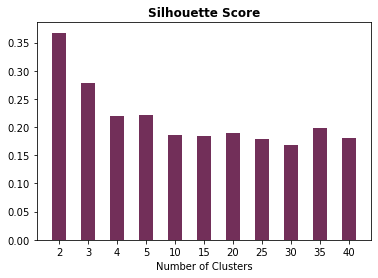

In [53]:
# candidate values for our number of cluster
parameters = [2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40]
# instantiating ParameterGrid, pass number of clusters as input
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
kmeans_model = KMeans()     # instantiating KMeans model
silhouette_scores = []
# evaluation based on silhouette_score
for p in parameter_grid:
    kmeans_model.set_params(**p)    # set current hyper parameter
    kmeans_model.fit(dataset)          # fit model on wine dataset, this will find clusters based on parameter p
    ss = metrics.silhouette_score(dataset, kmeans_model.labels_)   # calculate silhouette_score
    silhouette_scores += [ss]       # store all the scores
    print('Parameter:', p, 'Score', ss)
    # check p which has the best score
    if ss > best_score:
        best_score = ss
        best_grid = p
# plotting silhouette score
plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')
plt.show()

# K-Means cluster

In [55]:
# fitting KMeans    
kmeans = KMeans(n_clusters=3)
kmeans.fit(dataset)

KMeans(n_clusters=3)

## Divide the data into train and test datasets into 70% training and 30% testing

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 17)

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Decision Tree Classifier

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)
accuracy = dtree_model.score(X_test, y_test)
print(accuracy)
# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)

0.5


### SVM Classifier

In [79]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)
  
# model accuracy for X_test  
accuracy = svm_model_linear.score(X_test, y_test)
print(accuracy)
# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)

0.75


### KNN Classifier

In [104]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
  
# accuracy on X_test
accuracy = knn.score(X_test, y_test)
print (accuracy)
  
# creating a confusion matrix
knn_predictions = knn.predict(X_test) 
cm = confusion_matrix(y_test, knn_predictions)


0.6428571428571429


### Logistic Regression

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#  Train the model
LR_clf = LogisticRegression().fit(X_train, y_train)
#  Let's test it Talentmine model!!
LR_prediction = LR_clf.predict(X_test)
# Now compare between predicted sports and actual athletes
LR_accuracy = accuracy_score(y_test, LR_prediction)
# Accuracy | الضبط 
print(f'Logistic Regression Accuracy: {LR_accuracy:.2f} %')

Logistic Regression Accuracy: 0.75 %


In [106]:

# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
  
# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
print (accuracy)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, gnb_predictions)

0.6071428571428571


## Data Training

In [465]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# We start prediction - يارب!

# KNN

In [466]:
y_pred = classifier.predict(X_test)

In [478]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
#print("Confusion Matrix:")
#print(result)
result1 = classification_report(y_test, y_pred)
#print("Classification Report:",)
#print (result1)
result2 = accuracy_score(y_test,y_pred)
print(f'The KNN Accuracy: {result2:.2f} %')

The KNN Accuracy: 0.64 %


Support Vector Classifier accuracy: 67.86 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#  Train the model
LR_clf = LogisticRegression().fit(X_train, y_train)
#  Let's test it Talentmine model!!
LR_prediction = LR_clf.predict(X_test)
# Now compare between predicted sports and actual athletes
LR_accuracy = accuracy_score(y_test, LR_prediction)
# Accuracy | الضبط 
print(f'Logistic Regression Accuracy: {LR_accuracy:.2f} %')

Logistic Regression Accuracy: 1.00 %
